In [5]:
%matplotlib inline 
from IPython.display import display
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn 
import sklearn
import matplotlib 
from matplotlib import font_manager, rc 

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family = font_name) 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
# 교차 검증

from sklearn.datasets import make_blobs # 인위적인 데이터세트를 만드는 기능
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)

print("평가용 데이터 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

평가용 데이터 세트 점수: 0.88


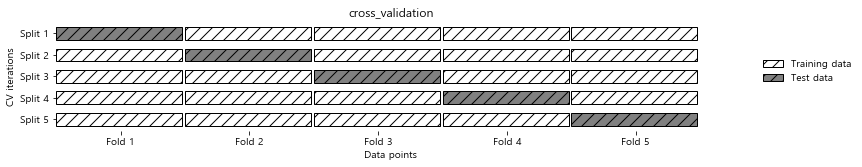

In [6]:
mglearn.plots.plot_cross_validation()

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
scores = cross_val_score(logreg, iris.data, iris.target, cv = 5)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.97


In [10]:
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, cv = 5, return_train_score = True)
display(res)

# test_score가 정확도임
# score_time은 평가 시간
# train_score 훈련용 정확도

# 정확하고 자세하게 알려주는 함수

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'fit_time': array([0.04112887, 0.03349781, 0.04156613, 0.04150081, 0.0409193 ]),
 'score_time': array([0.00103807, 0.        , 0.        , 0.00099778, 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [11]:
res_df = pd.DataFrame(res)
display(res_df)
print("평균 시간고 점수:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.041129,0.001038,0.966667,0.966667
1,0.033498,0.000000,1.000000,0.966667
2,0.041566,0.000000,0.933333,0.983333
3,0.041501,0.000998,0.966667,0.983333
4,0.040919,0.000000,1.000000,0.975000


평균 시간고 점수:
 fit_time       0.039723
score_time     0.000407
test_score     0.973333
train_score    0.975000
dtype: float64


In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
print("iris 레이블:\n", iris.target)

iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


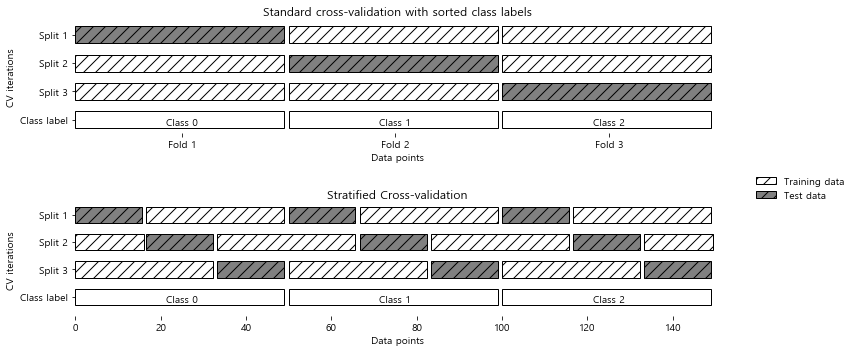

In [13]:
mglearn.plots.plot_stratified_cross_validation()

In [14]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [16]:
print("교차 검증 점수:\n", cross_val_score(logreg, iris.data, iris.target, cv = kfold))

교차 검증 점수:
 [1.         1.         0.86666667 0.93333333 0.83333333]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [17]:
kfold = KFold(n_splits = 3)
print("교차 검증 점수:\n", cross_val_score(logreg, iris.data, iris.target, cv = kfold))

교차 검증 점수:
 [0. 0. 0.]


In [18]:
kfold = KFold(n_splits= 3, shuffle = True, random_state= 0)
print("교차 검증 점수:\n", cross_val_score(logreg, iris.data, iris.target, cv = kfold))

# shuffle을 True해주면 교차검증에 더 유리

교차 검증 점수:
 [0.98 0.96 0.96]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

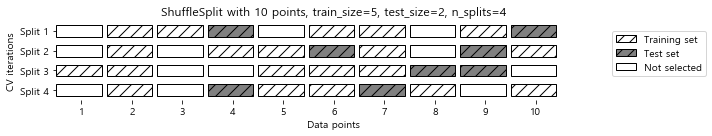

In [19]:
mglearn.plots.plot_shuffle_split()

In [20]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size = 5, train_size = 5, n_splits = 10)
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [1.  1.  0.4 0.6 0.6 0.6 0.8 1.  0.6 0.6]


In [22]:
from sklearn.model_selection import GroupKFold
# 인위적 데이터 셋 생성

X, y = make_blobs(n_samples = 12, random_state = 0)
# 처음 세 개의 샘플은 같은 그룹에 속하고
#다음은 네 개의 샘플이 같습니다

groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups, cv = GroupKFold(n_splits=3))
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [0.75       0.6        0.66666667]


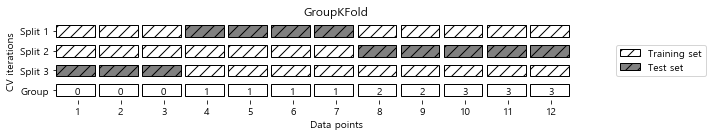

In [23]:
mglearn.plots.plot_group_kfold()

In [24]:
# 그리드 서치(성능 개선)

from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
print("훈련 세트의 크기: {} 테스트 세트의 크기: {}".format(
X_train.shape[0], X_test.shape[0]))

best_score = 0

훈련 세트의 크기: 112 테스트 세트의 크기: 38


In [27]:
for gamma in[0.001,0.01,0.1,1,10,100]:
    for C in[0.001, 0.01,0.1,1,10,100]:
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        
        score = svm.score(X_test, y_test)
        
        if score>best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            
            
print("최고 점수: {:.2f}".format(best_score))
print("최적 파라미터 :",best_parameters)

최고 점수: 0.97
최적 파라미터 : {'C': 100, 'gamma': 0.001}


In [29]:
from sklearn.svm import SVC

X_trainval, X_test, y_trainval, y_test = train_test_split(
iris.data, iris.target, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(
X_trainval, y_trainval, random_state=1)

print("훈련 세트의 크기: {} 검증 세트의 크기:{} 테스트세트의 크기:{}\n".format(
X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in[0.001,0.01,0.1,1,10,100]:
    for C in[0.001, 0.01,0.1,1,10,100]:
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        
        score = svm.score(X_test, y_test)
        
        if score>best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터 :",best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

훈련 세트의 크기: 84 검증 세트의 크기:28 테스트세트의 크기:38

검증 세트에서 최고 점수: 0.97
최적 파라미터 : {'C': 100, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.97


In [30]:
for gamma in[0.001,0.01,0.1,1,10,100]:
    for C in[0.001, 0.01,0.1,1,10,100]:
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        
        score = svm.score(X_test, y_test)
        
        if score>best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

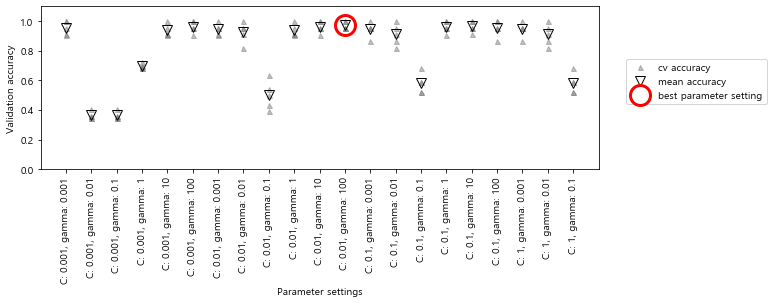

In [32]:
mglearn.plots.plot_cross_val_selection()

In [33]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100],
             'gamma':[0.001,0.01,0.1,1,10,100]}
print("매개변수 그리드:\n", param_grid)

매개변수 그리드:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv = 5, return_train_score = True)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [36]:
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수 : {:.2f}".format(grid_search.best_score_))

최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수 : 0.97


In [37]:
pd.set_option("display.max_columns",None)

results = pd.DataFrame(grid_search.cv_results_)

display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.00136013,0.00184684,0.00156403,0.00201621,0.00182762
std_fit_time,0.000476098,0.000294474,0.000387814,6.95023e-05,0.00114363
mean_score_time,0.000898361,0.000162983,0.000814533,0.000786257,0.000987339
std_score_time,0.000213438,0.000273817,0.000408546,0.000396674,5.68282e-05
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


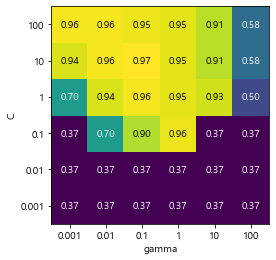

In [38]:
scores = np.array(results.mean_test_score).reshape(6,6)

mglearn.tools.heatmap(scores, xlabel = 'gamma', xticklabels = param_grid['gamma'],
                     ylabel = 'C', yticklabels=param_grid['C'], cmap="viridis")

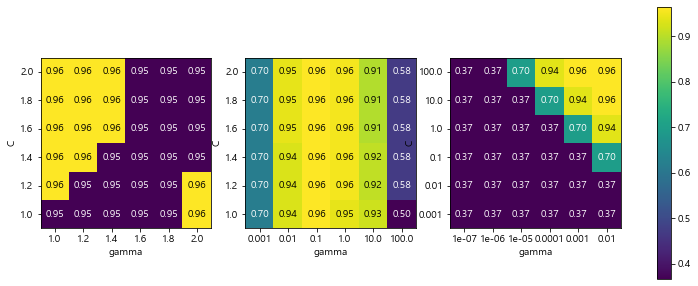

In [41]:
flg, axes = plt.subplots(1,3,figsize = (13, 5))

param_grid_linear = {'C':np.linspace(1,2,6),
                    'gamma': np.linspace(1,2,6)}

param_grid_one_log = {'C':np.linspace(1,2,6),
                    'gamma': np.logspace(-3,2,6)}

param_grid_range = {'C':np.logspace(-3,2,6),
                    'gamma': np.logspace(-7,-2,6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    
    scores_image = mglearn.tools.heatmap(
    scores, xlabel = 'gamma', ylabel = 'C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'],cmap = 'viridis', ax = ax)
    
plt.colorbar(scores_image, ax = axes.tolist())